In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc



In [6]:
df = pd.read_csv("ensemble_data.csv")

In [7]:
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


We have 3 features that are that are to be converted to dadte time and drop that unnamed column

In [9]:
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])


C:\Users\Asus\AppData\Local\Temp\ipykernel_23828\883707178.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])


In [10]:
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_23828\3430782766.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])


In [11]:
    df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_23828\3372397277.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [13]:
df.drop(columns="Unnamed: 0",inplace=True)

In [14]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [15]:
new_df = df.copy()

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [17]:
new_df["Churn"] = new_df["LastWorkingDate"].map(lambda x : 0 if pd.isna(x) else 1)

Creating a target variable Churn which is catogorical either 0 or 1

In [18]:
new_df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,0


In [19]:
new_df[new_df["Driver_ID"] == 12]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn
22,2019-07-01,12,35.0,0.0,C23,2,28116,2019-06-29,NaT,1,1,500000,4,0
23,2019-08-01,12,35.0,0.0,C23,2,28116,2019-06-29,NaT,1,1,1707180,4,0
24,2019-09-01,12,35.0,0.0,C23,2,28116,2019-06-29,NaT,1,1,400000,4,0
25,2019-10-01,12,35.0,0.0,C23,2,28116,2019-06-29,NaT,1,1,0,1,0
26,2019-11-01,12,35.0,0.0,C23,2,28116,2019-06-29,NaT,1,1,0,1,0
27,2019-12-01,12,35.0,0.0,C23,2,28116,2019-06-29,2019-12-21,1,1,0,1,1


In [20]:
qr_first = new_df.groupby("Driver_ID").agg({"Quarterly Rating":"first"})

In [21]:
qr_last = new_df.groupby("Driver_ID").agg({"Quarterly Rating":"last"})

In [22]:
driver_qr = pd.merge(qr_first,qr_last,on="Driver_ID").reset_index()

In [23]:
driver_qr["rating"] = np.where(driver_qr["Quarterly Rating_x"] < driver_qr["Quarterly Rating_y"],1,0)

In [24]:
driver_qr

,Driver_ID,Quarterly Rating_x,Quarterly Rating_y,rating
0,1,2,2,0
1,2,1,1,0
2,4,1,1,0
3,5,1,1,0
4,6,1,2,1
...,...,...,...,...
2376,2784,3,4,1
2377,2785,1,1,0
2378,2786,2,1,0
2379,2787,2,1,0


Creating a column for checking raise in rating

In [25]:
inter = new_df.groupby(["Driver_ID"])["Churn"].agg("last").reset_index()

In [26]:
driver_qr = pd.merge(driver_qr,inter,on="Driver_ID")

In [27]:
driver_qr

,Driver_ID,Quarterly Rating_x,Quarterly Rating_y,rating,Churn
0,1,2,2,0,1
1,2,1,1,0,0
2,4,1,1,0,1
3,5,1,1,0,1
4,6,1,2,1,0
...,...,...,...,...,...
2376,2784,3,4,1,0
2377,2785,1,1,0,1
2378,2786,2,1,0,1
2379,2787,2,1,0,1


In [28]:
inc_before = new_df.groupby(["Driver_ID"]).agg({"Income":"first"})

inc_after = new_df.groupby(["Driver_ID"]).agg({"Income":"last"})

In [29]:

driver_qr = driver_qr.merge(inc_before,on="Driver_ID")


In [30]:
driver_qr = driver_qr.merge(inc_after,on="Driver_ID")

In [31]:
driver_qr["IncomeRating"] = np.where(driver_qr["Income_x"]<driver_qr["Income_y"],1,0)

In [32]:
driver_qr.head()

,Driver_ID,Quarterly Rating_x,Quarterly Rating_y,rating,Churn,Income_x,Income_y,IncomeRating
0,1,2,2,0,1,57387,57387,0
1,2,1,1,0,0,67016,67016,0
2,4,1,1,0,1,65603,65603,0
3,5,1,1,0,1,46368,46368,0
4,6,1,2,1,0,78728,78728,0


Creating a feature for increase in income

In [33]:
driver_qr.rename(columns={"rating":"RatingRaise"},inplace=True)

In [34]:
driver_qr

,Driver_ID,Quarterly Rating_x,Quarterly Rating_y,RatingRaise,Churn,Income_x,Income_y,IncomeRating
0,1,2,2,0,1,57387,57387,0
1,2,1,1,0,0,67016,67016,0
2,4,1,1,0,1,65603,65603,0
3,5,1,1,0,1,46368,46368,0
4,6,1,2,1,0,78728,78728,0
...,...,...,...,...,...,...,...,...
2376,2784,3,4,1,0,82815,82815,0
2377,2785,1,1,0,1,12105,12105,0
2378,2786,2,1,0,1,35370,35370,0
2379,2787,2,1,0,1,69498,69498,0


In [35]:
driver_qr = driver_qr[["Driver_ID","Churn","RatingRaise","IncomeRating"]]

In [36]:
driver_qr.head()

,Driver_ID,Churn,RatingRaise,IncomeRating
0,1,1,0,0
1,2,0,0,0
2,4,1,0,0
3,5,1,0,0
4,6,0,1,0


In [37]:
new_df=new_df.merge(driver_qr,on="Driver_ID",how="left")

In [38]:
new_df.drop(columns="Churn_x",inplace=True)

In [39]:
new_df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_y,RatingRaise,IncomeRating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,1,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,0,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,0,1,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,0,1,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,0,1,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,0,1,0


Aggrigating the dataset to merge the duplicated data

In [40]:
d = {'MMM-YY':'count',
 'Age':"first",
 'Gender':"last",
 'City':"last",
 'Education_Level':"last",
 'Income':"sum",
 'Dateofjoining':"first",
 'LastWorkingDate':"last",
 'Joining Designation':"last",
 'Grade':"last",
 'Total Business Value':"sum",
 'Quarterly Rating':"last",
 "Churn_y":"first", 
"RatingRaise" :"first",
"IncomeRating":"first"
}  

In [41]:
# functions = {'MMM-YY':'count',
#              'Driver_ID':'first',
#              'Age':'max',
#              'Gender':'last',
#             'City':'last',
#              'Education_Level':'last',
#              'Dateofjoining':'first',
#             'LastWorkingDate':'last',
#              'Grade':'last',
#              'Total Business Value':'sum',
#             'Income':'sum',
#              'Dateofjoining':'first',
#              'LastWorkingDate':'last',
#             'Joining Designation':'last',
#              'Grade':'last',
#              'Quarterly Rating':'first'}

In [42]:
d = {'MMM-YY':'count',
 'Age':"first",
 'Gender':"last",
 'City':"last",
 'Education_Level':"last",
 'Income':"sum",
 'Dateofjoining':"first",
 'LastWorkingDate':"last",
 'Joining Designation':"last",
 'Grade':"last",
 'Total Business Value':"sum",
 'Quarterly Rating':"last",
 "Churn_y":"first", 
"RatingRaise" :"first",
"IncomeRating":"first",
      "Month":"first",
      "Year":"first"
}  

In [43]:
new_df["City"]=new_df['City'].astype("str").str.extractall('(\d+)').unstack().fillna("").sum(axis=1).astype("int")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_23828\563726360.py:1: SyntaxWarning: invalid escape sequence '\d'
  new_df["City"]=new_df['City'].astype("str").str.extractall('(\d+)').unstack().fillna("").sum(axis=1).astype("int")


In [44]:
driver_qr["IncomeRating"].nunique()

2

In [45]:
new_df["Month"] = new_df["Dateofjoining"].dt.month

In [46]:
new_df["Year"] = new_df["Dateofjoining"].dt.year

In [47]:
new_df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_y,RatingRaise,IncomeRating,Month,Year
0,2019-01-01,1,28.0,0.0,23,2,57387,2018-12-24,NaT,1,1,2381060,2,1,0,0,12,2018
1,2019-02-01,1,28.0,0.0,23,2,57387,2018-12-24,NaT,1,1,-665480,2,1,0,0,12,2018
2,2019-03-01,1,28.0,0.0,23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,0,0,12,2018
3,2020-11-01,2,31.0,0.0,7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,11,2020
4,2020-12-01,2,31.0,0.0,7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,27,2,70254,2020-06-08,NaT,2,2,740280,3,0,1,0,6,2020
19100,2020-09-01,2788,30.0,0.0,27,2,70254,2020-06-08,NaT,2,2,448370,3,0,1,0,6,2020
19101,2020-10-01,2788,30.0,0.0,27,2,70254,2020-06-08,NaT,2,2,0,2,0,1,0,6,2020
19102,2020-11-01,2788,30.0,0.0,27,2,70254,2020-06-08,NaT,2,2,200420,2,0,1,0,6,2020


In [48]:
driver_ovr = new_df.groupby(["Driver_ID"]).agg(d).reset_index()

In [49]:
driver_ovr

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn_y,RatingRaise,IncomeRating,Month,Year
0,1,3,28.0,0.0,23,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,1,0,0,12,2018
1,2,2,31.0,0.0,7,2,134032,2020-11-06,NaT,2,2,0,1,0,0,0,11,2020
2,4,5,43.0,0.0,13,2,328015,2019-12-07,2020-04-27,2,2,350000,1,1,0,0,12,2019
3,5,3,29.0,0.0,9,0,139104,2019-01-09,2019-03-07,1,1,120360,1,1,0,0,1,2019
4,6,5,31.0,1.0,11,1,393640,2020-07-31,NaT,3,3,1265000,2,0,1,0,7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,33.0,0.0,24,0,1987560,2015-10-15,NaT,2,3,21748820,4,0,1,0,10,2015
2377,2785,3,34.0,1.0,9,0,36315,2020-08-28,2020-10-28,1,1,0,1,1,0,0,8,2020
2378,2786,9,44.0,0.0,19,0,318330,2018-07-31,2019-09-22,2,2,2815090,1,1,0,0,7,2018
2379,2787,6,28.0,1.0,20,2,416988,2018-07-21,2019-06-20,1,1,977830,1,1,0,0,7,2018


## Data Visualization

Univariate Categorical

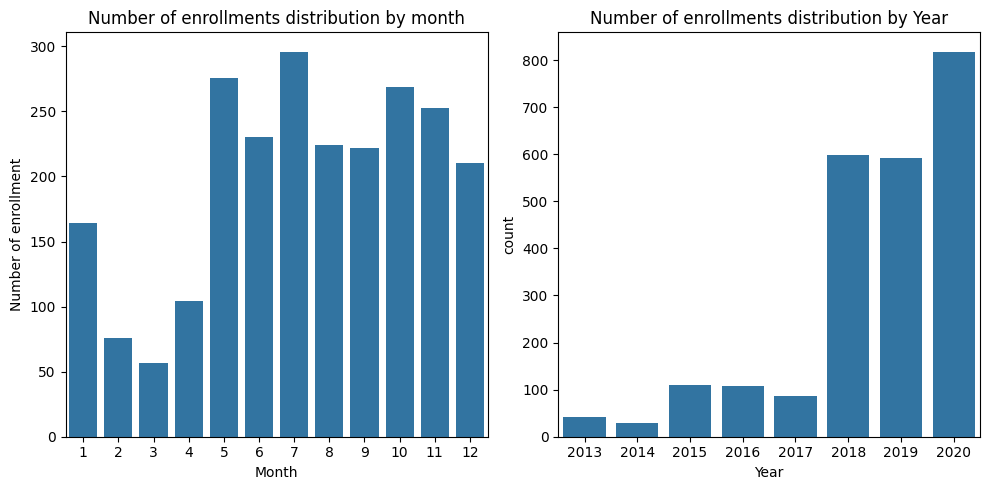

In [50]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Number of enrollments distribution by month")

sns.countplot(x=driver_ovr["Month"])
plt.ylabel("Number of enrollment")
plt.subplot(1,2,2)
plt.title("Number of enrollments distribution by Year")

sns.countplot(x=driver_ovr["Year"])
plt.tight_layout()
plt.show()

2020 had the max number of enrollments followed by year 2019 and 2018. July month had highest number of enrollment followed by may and october. we seasonality.

In [51]:
new_df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Churn_y',
       'RatingRaise', 'IncomeRating', 'Month', 'Year'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_23828\462841620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=p_df.values,palette="Set2",)


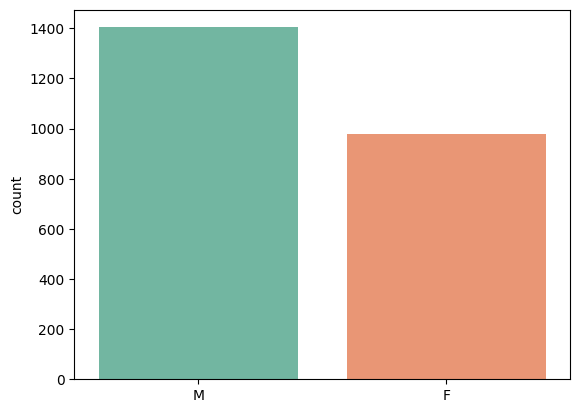

Gender
M    58.966821
F    41.033179
Name: proportion, dtype: float64


In [52]:

p_df=driver_ovr["Gender"].map({0:"M",1:"F"})
sns.countplot(x=p_df.values,palette="Set2",)
plt.show()
print(p_df.value_counts(normalize = True)*100)



Male drivers are more in ratio as compared to female drivers.

In [53]:
driver_ovr["RatingRaise"].value_counts(normalize = True)

RatingRaise
0    0.849643
1    0.150357
Name: proportion, dtype: float64

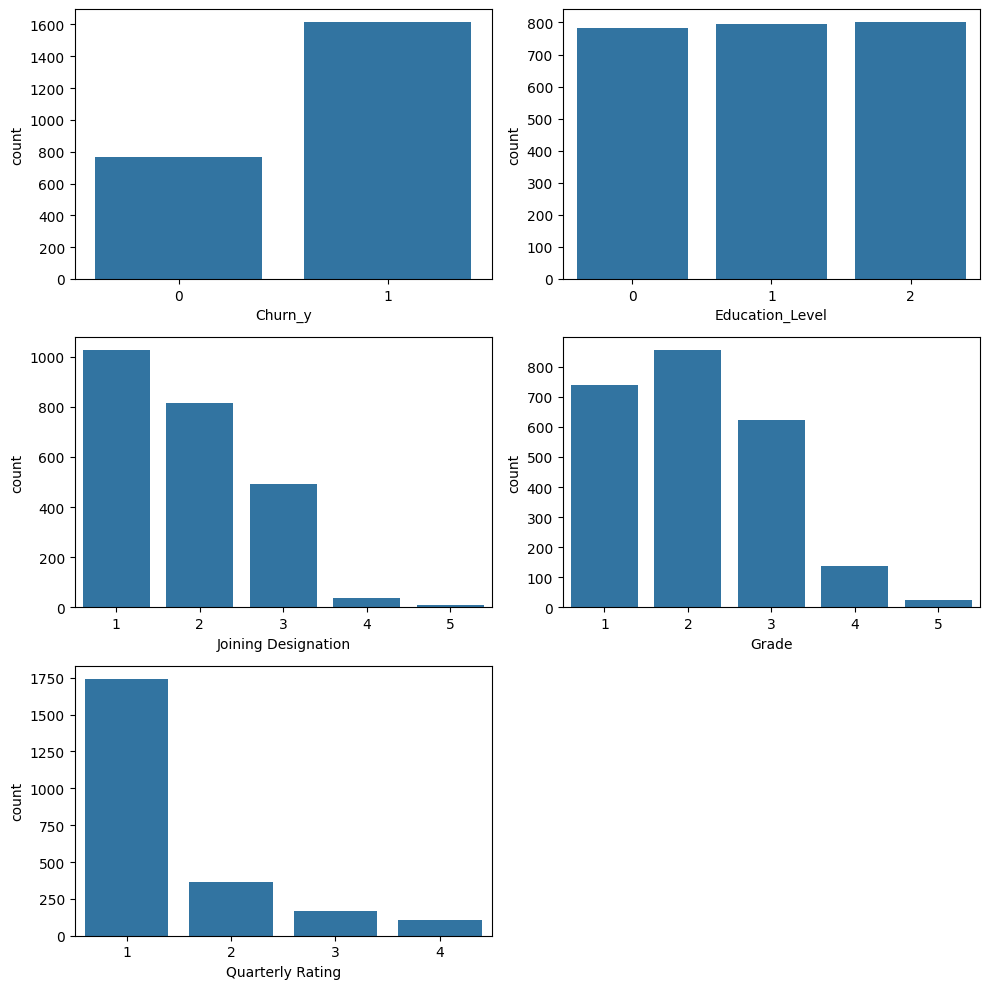

In [54]:
cols = ["Churn_y","Education_Level","Joining Designation","Grade","Quarterly Rating"]
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    plt.subplot(len(cols)//2+1,len(cols)//2,i+1)
    sns.countplot(x=driver_ovr[cols[i]])
    
plt.tight_layout()
plt.show()

- Churn rate is high
- Almost equal distribution when it comes to education level.
- People with Joining Designation 1 are comparitively more in number followed by 2 and 3. 4 and 5 are least

Bivariate analysis vs target categorical

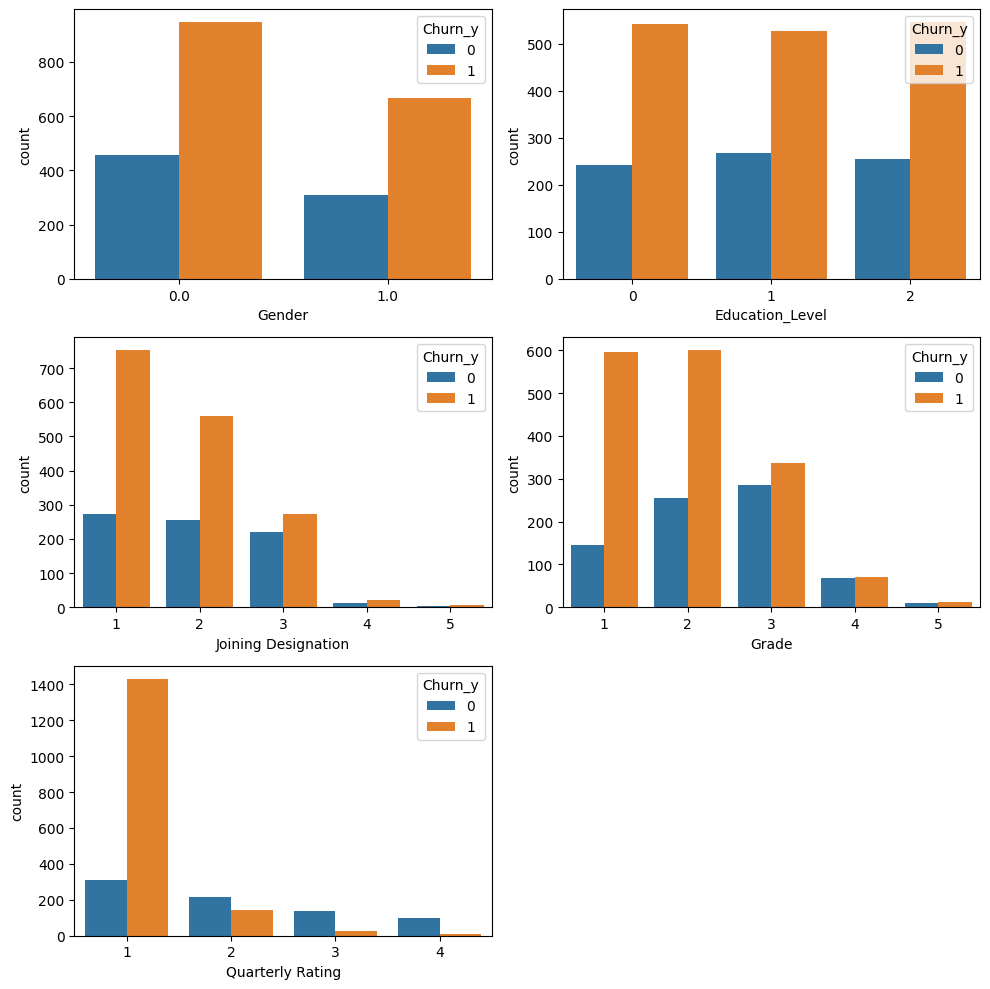

In [55]:
cols = ["Gender","Education_Level","Joining Designation","Grade","Quarterly Rating"]

target = "Churn_y"

plt.figure(figsize=(10,10))
for i in range(len(cols)):
    plt.subplot(len(cols)//2+1,len(cols)//2,i+1)
    sns.countplot(x=driver_ovr[cols[i]],hue=driver_ovr[target])
    
plt.tight_layout()
plt.show()

Univariate analysis of numerical columns

In [56]:
num_cols=new_df.select_dtypes(include=["int","float"])

In [57]:
num_cols.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Churn_y', 'RatingRaise', 'IncomeRating', 'Month',
       'Year'],
      dtype='object')

In [58]:
num_cols = ['Age', 'Income','Total Business Value']

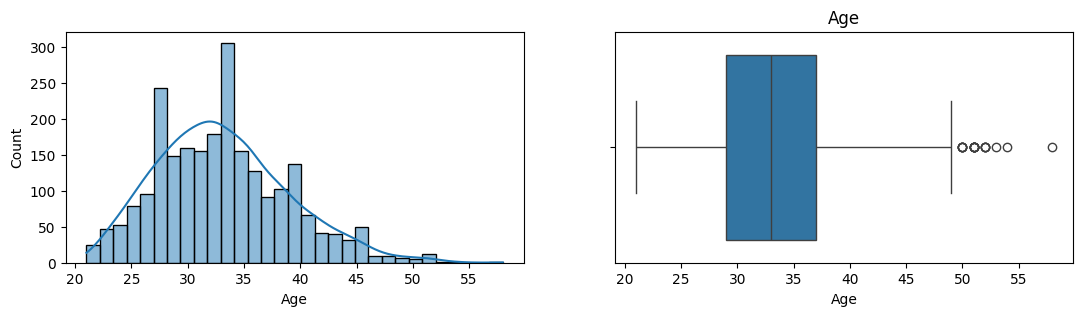

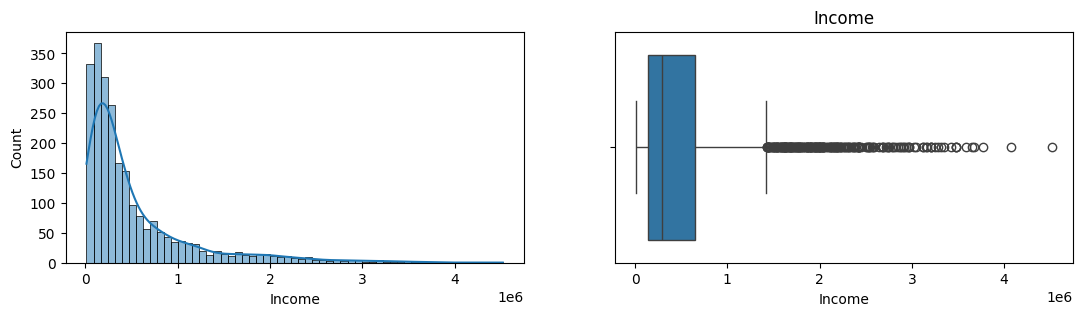

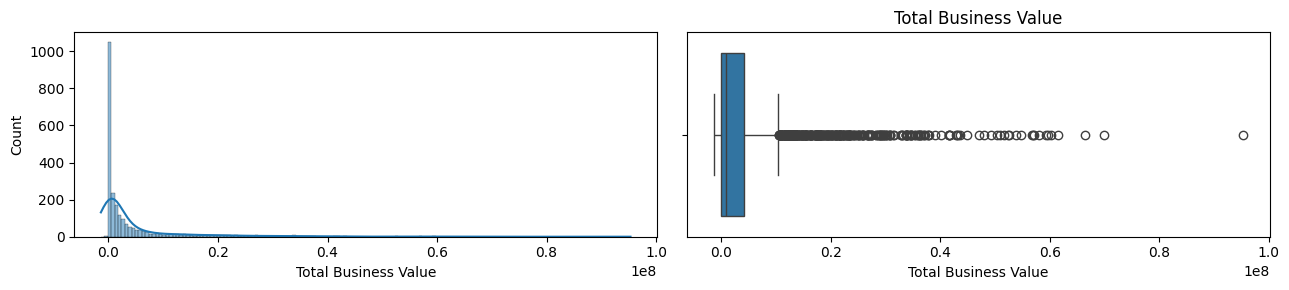

In [59]:
for i in range(len(num_cols)):
    plt.figure(figsize=(13,3))

    plt.subplot(121)
    sns.histplot(driver_ovr[num_cols[i]],kde=True)
    plt.subplot(122)
    sns.boxplot(x=driver_ovr[num_cols[i]])
    plt.title(num_cols[i])
plt.tight_layout()
plt.show()

Presence of outliers in the numerical columns is high.

In [60]:
driver_ovr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   int32         
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  Churn_y           

<Axes: xlabel='Age', ylabel='Income'>

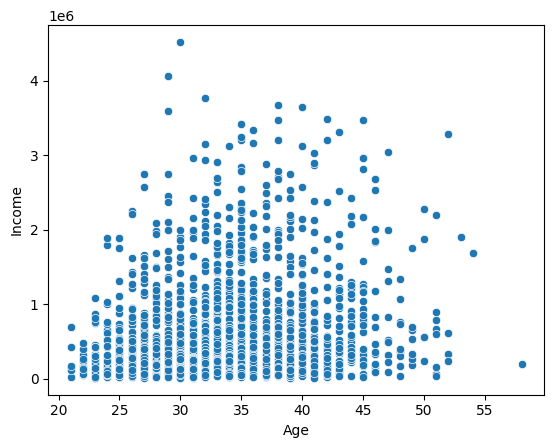

In [61]:
sns.scatterplot(x = driver_ovr["Age"],y = driver_ovr["Income"])

Age 35-40 have higher income as comapred to other age category

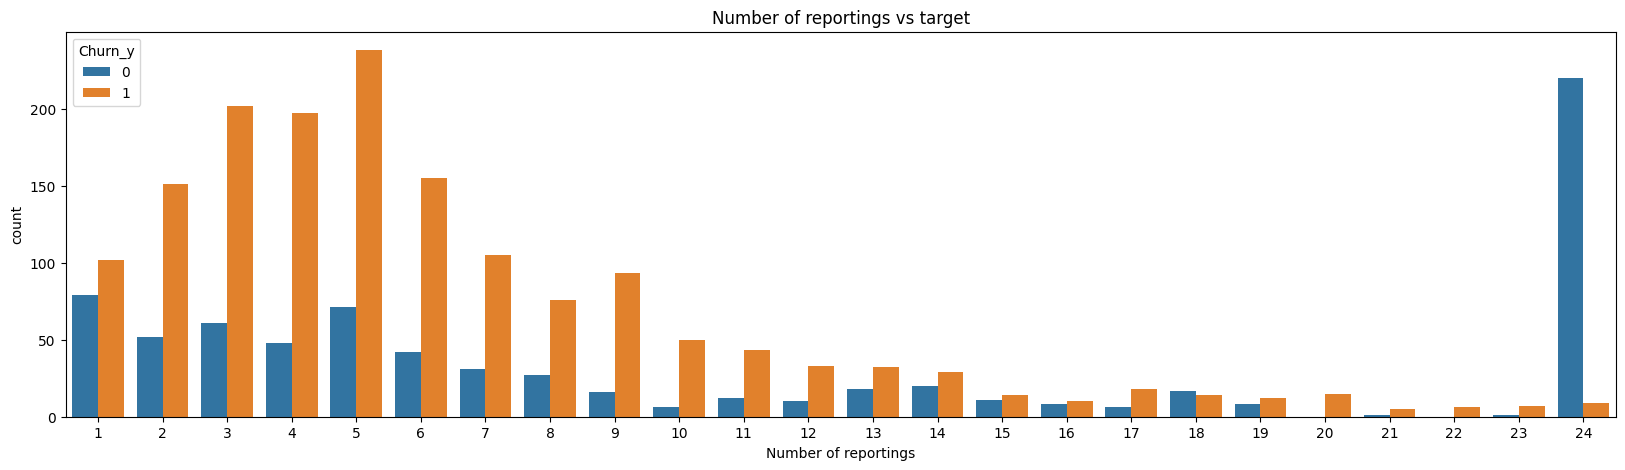

In [62]:
plt.figure(figsize=(20,5))
sns.countplot(x = driver_ovr["MMM-YY"],hue=driver_ovr["Churn_y"])
plt.title("Number of reportings vs target")
plt.xlabel("Number of reportings")
plt.show()

people who have reported 24 times or more are less likely to churn

[]

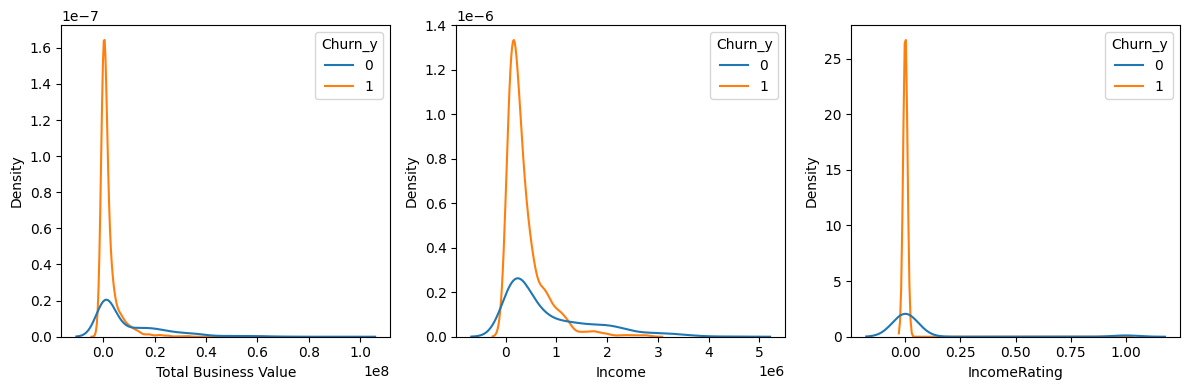

In [63]:
cols=["Total Business Value","Income","IncomeRating"]
plt.figure(figsize=(12,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=driver_ovr[cols[i]],hue=driver_ovr["Churn_y"])
    
plt.tight_layout()
plt.plot()

people with less business value, income and income rating are most likely to churn

<Axes: >

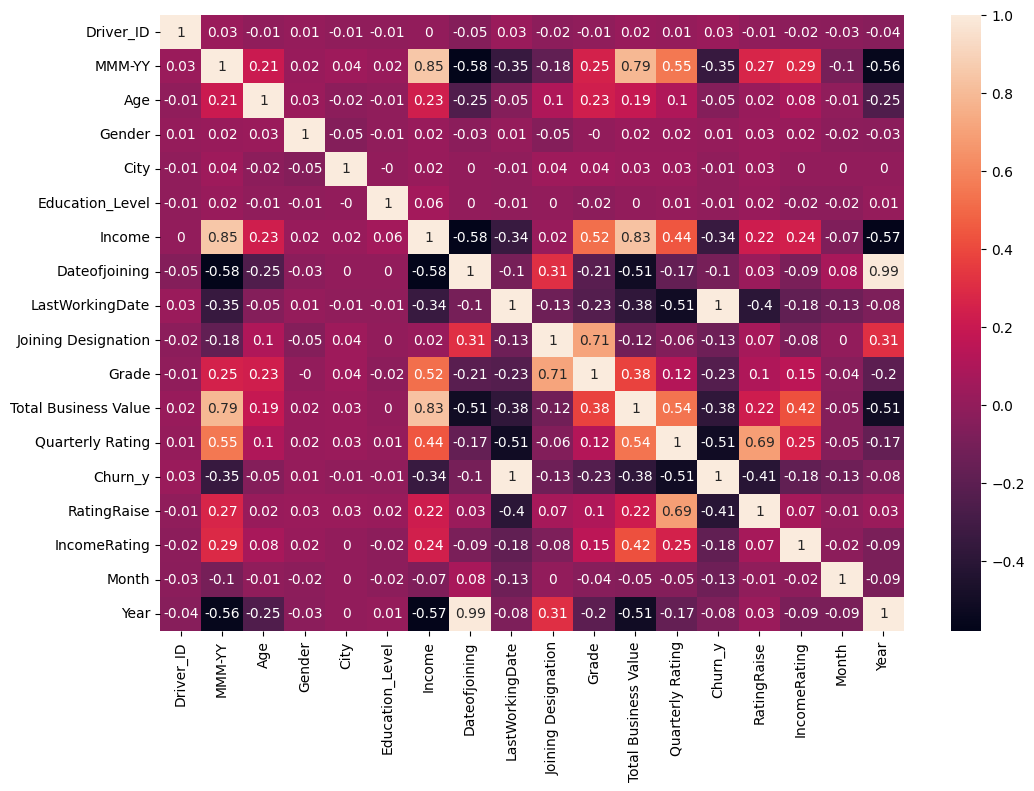

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(np.round(driver_ovr.corr(),2),annot=True)

## Data preparation

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [66]:
x = driver_ovr.columns.to_list()

In [67]:
for i in ["Churn_y","Dateofjoining","LastWorkingDate","Driver_ID"]:
    x.remove(i)

In [68]:
X = driver_ovr[x]
Y = driver_ovr["Churn_y"]

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [70]:
y_train

1403    1
1791    1
1696    1
596     1
284     1
       ..
2064    1
2106    1
2325    1
2303    1
1860    1
Name: Churn_y, Length: 1904, dtype: int64

In [71]:
x_test

,MMM-YY,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,RatingRaise,IncomeRating,Month,Year
717,4,33.0,1.0,20,1,232796,2,2,0,1,0,0,8,2020
333,24,32.0,1.0,20,2,2345328,2,4,27458220,3,1,0,6,2014
2168,24,27.0,0.0,20,0,1334274,1,3,33882080,4,1,1,6,2018
745,4,37.0,0.0,24,0,300532,3,3,0,1,0,0,4,2020
1826,3,27.0,0.0,6,1,178056,2,2,0,1,0,0,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,5,40.0,0.0,27,2,338425,3,3,0,1,0,0,12,2019
1384,5,31.0,0.0,1,1,172365,2,2,0,1,0,0,6,2019
1743,14,34.0,0.0,29,2,1299144,2,2,16924970,4,1,0,10,2019
2040,7,33.0,0.0,26,2,376250,2,2,0,1,0,0,6,2020


# Model building

## KNN

In [72]:
Knn_model = KNeighborsClassifier()

In [73]:
Knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
pred = Knn_model.predict(x_test)

In [75]:
kfold = KFold(n_splits=10)

cross_val_accuracy = cross_validate(Knn_model,X,Y,cv=kfold,scoring="accuracy",return_train_score=True)

In [76]:
print(f"K-Fold Accuracy Mean: \n Train: {cross_val_accuracy['train_score'].mean()*100:.2f} \n Validation: {cross_val_accuracy['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cross_val_accuracy['train_score'].std()*100:.2f}, \n Validation: {cross_val_accuracy['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 78.97 
 Validation: 71.69
K-Fold Accuracy Std: 
 Train: 0.56, 
 Validation: 3.59


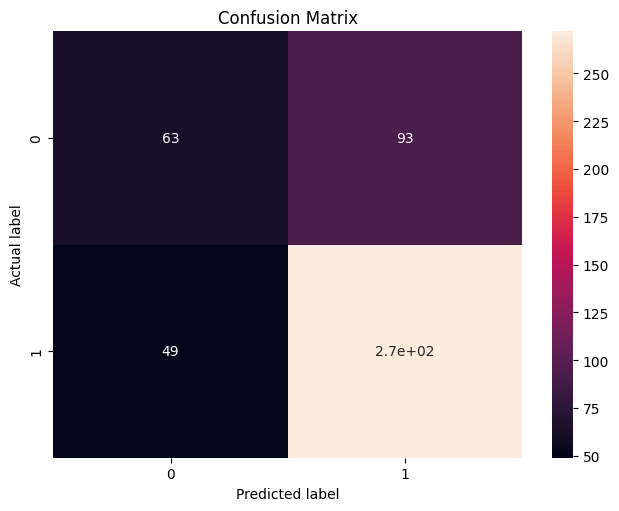

In [77]:
cnf = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf), annot=True)

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy is low in knn algorithm

## Decision Tree

In [78]:
kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=4, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, x_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print("-------------------------------------------------"*2)

K-Fold for depth:3 Accuracy Mean: Train: 91.64912969051954 Validation: 91.64673463764122
K-Fold for depth: 3 Accuracy Std: Train: 0.22019897200848065 Validation: 1.9799283505927179
--------------------------------------------------------------------------------------------------
K-Fold for depth:4 Accuracy Mean: Train: 91.77167054598611 Validation: 91.17415265913473
K-Fold for depth: 4 Accuracy Std: Train: 0.2515803996364954 Validation: 2.3406963106549514
--------------------------------------------------------------------------------------------------
K-Fold for depth:5 Accuracy Mean: Train: 93.01468419478746 Validation: 91.59437861669882
K-Fold for depth: 5 Accuracy Std: Train: 0.3822055588445146 Validation: 2.23475136398458
--------------------------------------------------------------------------------------------------
K-Fold for depth:6 Accuracy Mean: Train: 94.31605111846334 Validation: 90.6503168917057
K-Fold for depth: 6 Accuracy Std: Train: 0.25345800792517414 Validation: 2.3

max depth of 3 and 5 have max accuracy. can choose either of them.

In [79]:
tree_clf = DecisionTreeClassifier(random_state=4, max_depth=depth)

In [80]:
tree_clf.fit(x_train,y_train)
pred = tree_clf.predict(x_test)

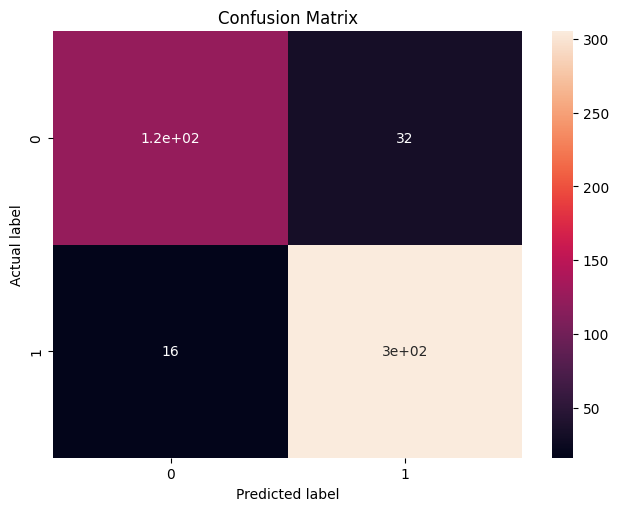

In [81]:
cnf = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf), annot=True)

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Slightly improved accuracy with true negatives

## Random forest

In [82]:
random_forest = RandomForestClassifier(random_state=6,max_depth=depth,n_estimators=100)

In [83]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(random_forest, X, Y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 99.98 
 Validation: 92.73
K-Fold Accuracy Std: 
 Train: 0.02, 
 Validation: 1.55


Training is good but validation seems to be a little less. Seems like overfit

### Grid search for hyperparameter tuning

In [84]:
params = {
    'n_estimators' : [50,55,60,65,70],
    'max_depth' : [9,11,12,13,14],
    'criterion' : ['gini'],
    'max_features' : [4,5,6,7],
    'bootstrap' : [True]    
    }

In [85]:
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid = params,scoring = 'accuracy',cv = 3,n_jobs=-1)

In [86]:
grid.fit(X,Y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [9, 11, 12, 13, 14],
                         'max_features': [4, 5, 6, 7],
                         'n_estimators': [50, 55, 60, 65, 70]},
             scoring='accuracy')

In [87]:
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 7, 'n_estimators': 50}
Best score:  0.9332229002089019


In [88]:
grid.best_params_["bootstrap"]

True

In [89]:
random_forest = RandomForestClassifier(random_state=6,max_depth=grid.best_params_["max_depth"],n_estimators=grid.best_params_["n_estimators"],bootstrap=grid.best_params_["bootstrap"],criterion=grid.best_params_["criterion"],max_features=grid.best_params_["max_features"])
random_forest.fit(x_train,y_train)
prediction = random_forest.predict(X)

In [90]:
report= classification_report(Y,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       765
           1       0.99      0.99      0.99      1616

    accuracy                           0.98      2381
   macro avg       0.98      0.98      0.98      2381
weighted avg       0.98      0.98      0.98      2381



tried a few different combinations to get the best fit. 

### Feature importances

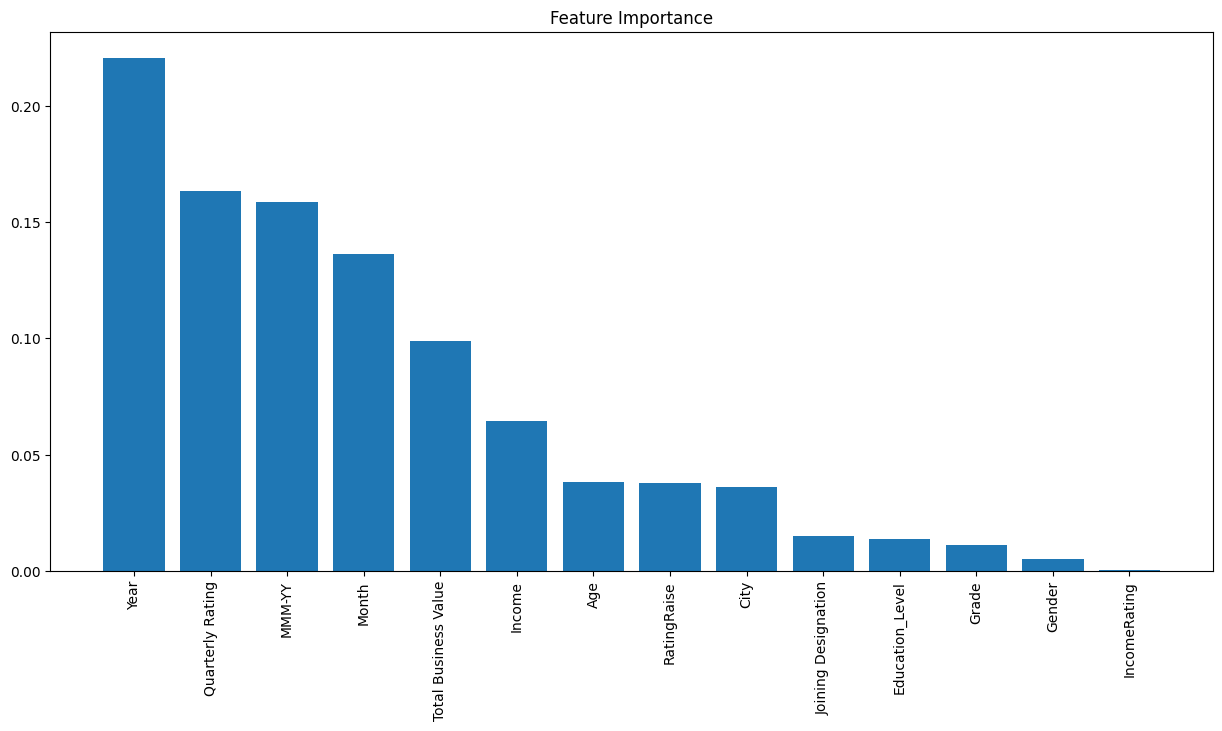

In [91]:
random_forest.fit(X, Y)
importances = random_forest.feature_importances_

indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices]) 
plt.xticks(range(X.shape[1]), names, rotation=90) 
plt.show() 

## Class imbalance treatment

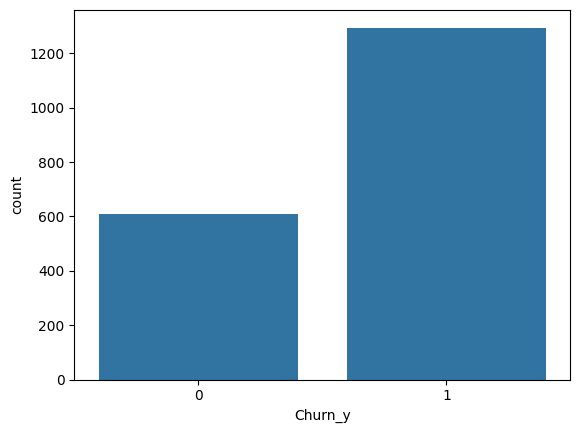

In [92]:
plot_cat = sns.countplot(x=y_train)

In [93]:
plot_cat.axes.patches

<Axes.ArtistList of 2 patches>

<Axes: xlabel='Churn_y', ylabel='count'>

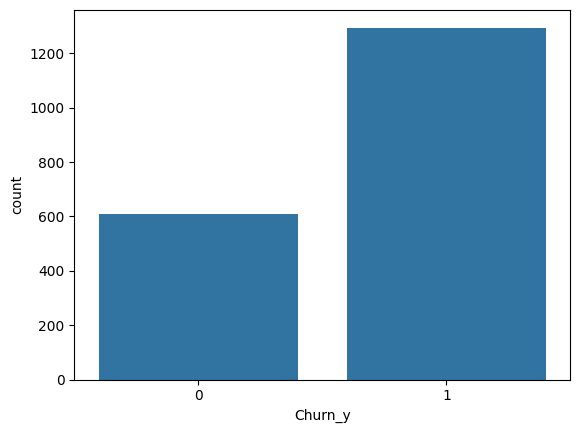

In [94]:
sns.countplot(x = y_train)

In [95]:
smt = SMOTE()
x_smote,y_smote = smt.fit_resample(x_train,y_train)

<Axes: xlabel='Churn_y', ylabel='count'>

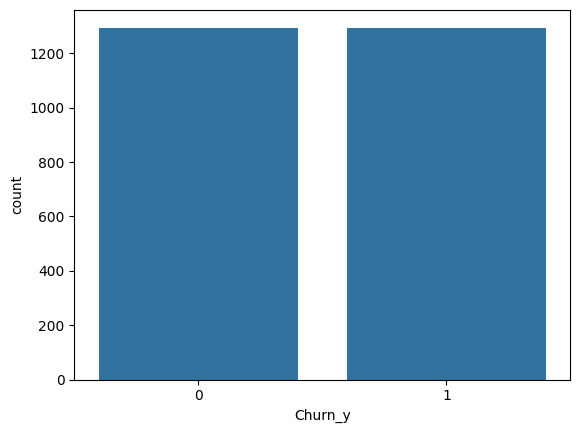

In [96]:
sns.countplot(x = y_smote)

In [97]:
random_forest = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 11, max_features= 6, n_estimators= 50)
random_forest.fit(x_smote,y_smote)

RandomForestClassifier(max_depth=11, max_features=6, n_estimators=50)

In [98]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(random_forest, X, Y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 99.21 
 Validation: 92.99
K-Fold Accuracy Std: 
 Train: 0.09, 
 Validation: 1.44


In [99]:
prediction = random_forest.predict(X)

In [100]:
report= classification_report(Y,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       765
           1       0.99      0.97      0.98      1616

    accuracy                           0.97      2381
   macro avg       0.97      0.97      0.97      2381
weighted avg       0.97      0.97      0.97      2381



## Boosting

### Gradient Boosted Decision Tree

In [101]:
GBDT = GradientBoostingClassifier(random_state=7,max_depth=5,n_estimators=40,learning_rate=0.1)
cross_val = cross_validate(GBDT,X,Y, cv=3,scoring = 'accuracy', return_train_score = True)

In [102]:
print(cross_val["train_score"].mean(),cross_val["test_score"].mean())

0.9724908563861391 0.9248218299711053


In [103]:
GBDT.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=40, random_state=7)

In [109]:
def ROC_AUC(model,test,actual):
    pred = model.predict(test)
    
    fpr,tpr,threshols = roc_curve(y_test,pred)    
    plt.figure(figsize=(7,5))
    sns.lineplot(x = fpr,y=tpr,label = f"Roc-auc accuracy: {auc(fpr,tpr):.2f}")
    plt.plot([0,1],[0,1],linestyle="--",label = "Accuracy: 0.5")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend(loc="lower right")
    plt.title("Roc-Auc curve")
    report= classification_report(y_test,pred)
    print(report)
    plt.show()

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       156
           1       0.95      0.95      0.95       321

    accuracy                           0.93       477
   macro avg       0.92      0.92      0.92       477
weighted avg       0.93      0.93      0.93       477



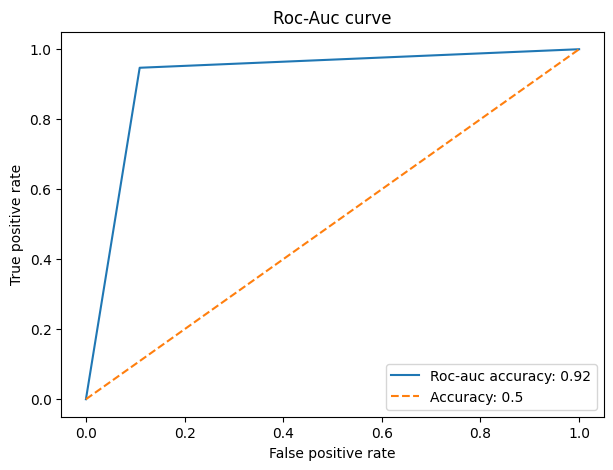

In [110]:
ROC_AUC(GBDT,x_test,y_test)

In [111]:
GBDT.fit(x_smote,y_smote)

GradientBoostingClassifier(max_depth=5, n_estimators=40, random_state=7)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       156
           1       0.95      0.90      0.93       321

    accuracy                           0.90       477
   macro avg       0.88      0.91      0.89       477
weighted avg       0.91      0.90      0.90       477



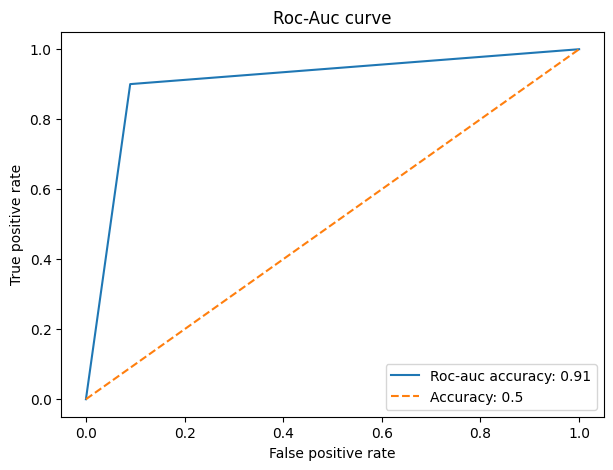

In [112]:
ROC_AUC(GBDT,x_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       156
           1       0.96      0.91      0.93       321

    accuracy                           0.91       477
   macro avg       0.89      0.91      0.90       477
weighted avg       0.92      0.91      0.91       477



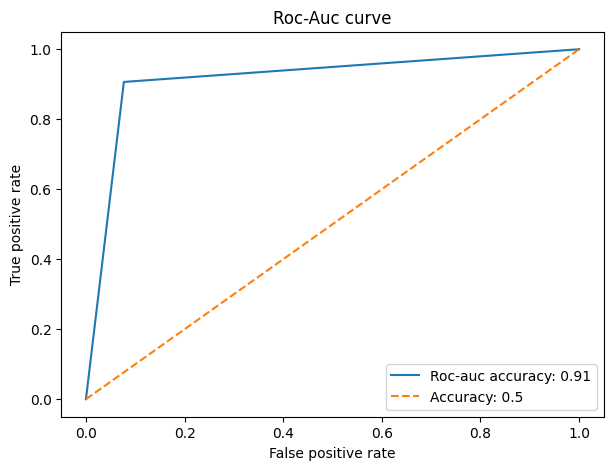

In [113]:
ROC_AUC(random_forest,x_test,y_test)

              precision    recall  f1-score   support

           0       0.56      0.40      0.47       156
           1       0.75      0.85      0.79       321

    accuracy                           0.70       477
   macro avg       0.65      0.63      0.63       477
weighted avg       0.69      0.70      0.69       477



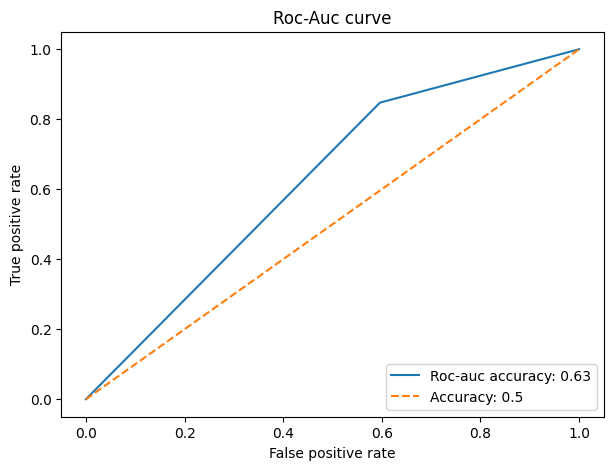

In [114]:
ROC_AUC(Knn_model,x_test,y_test)

### XG Boost

In [115]:
XGB = GradientBoostingClassifier()
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_test)

In [116]:
confusion_matrix(y_test,y_pred)

array([[143,  13],
       [ 16, 305]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       156
           1       0.96      0.95      0.95       321

    accuracy                           0.94       477
   macro avg       0.93      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477



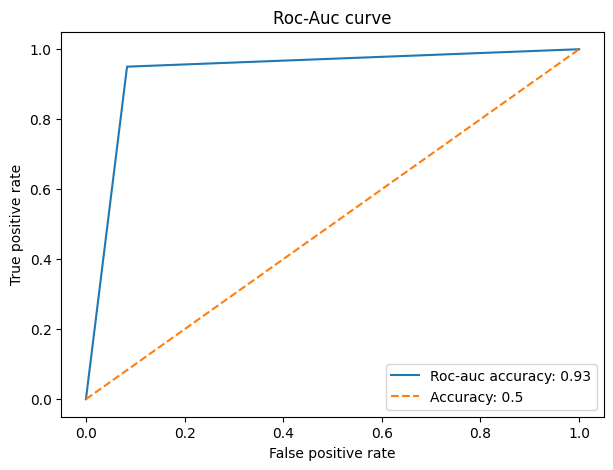

In [117]:
ROC_AUC(XGB,x_test,y_test)

<h1>Insights</h1>

- So we see that there are 58% male employees and 42% female employees.
- The percentages of employees with different education levels are almost same for level 1 & 2.
- 84% of the employees who did not get a raise.
- Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at - higher levels.
- Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
- Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
- Number of employees has been increase with increase in year as well as number of reportings.
- The majority of the employees seem to be associated with city C20.
- Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
- Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
- Income decreses with increase in Destination as about 4% of the employees hold higher designations.
- The median of the Income for employees having higher Grades is greater.
- Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
- Joining Designation Increases with increase in Grade.
- Top reporting days is 24 days.
- Most of the reportings of the employees has got Quarlerly Rating 1.
- Number of reportings increases with increase in Income as well as Total Business Value.
- Recall increased after treatment of data imbalance and is performing better in Gradient Boosting.
- Precision dropped after treatment of data imbalance and is performing better in Random Forest.

- F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.

## Recommendations

- Consider implementing strategies to improve gender diversity, such as targeted recruitment efforts or diversity and inclusion programs.
- Since the percentages of employees with different education levels are similar for levels 1 and 2, evaluate if there are specific educational qualifications that correlate with success at higher levels. This can inform your recruitment and development strategies.
- Given that 84% of employees who did not get a raise, reassess the criteria for salary increases and promotions. Ensure that the process is transparent and aligned with employee performance.
- Understand the factors contributing to the concentration of employees at designation levels 1, 2, and 3. Ensure there are clear career paths and development opportunities for progression.
- Since the majority of employees are associated with city C20, consider analyzing the impact of location on employee satisfaction, productivity, and retention.
- Investigate the reasons behind the low percentage of employees receiving a raise despite promotions. Address any discrepancies in the reward system to maintain employee satisfaction.
